# Look at the big picture

## Clearly Clarify Tasks

+ In this case analysis, my mission is to use **Linear Regression** to build a prediction engine. 
+ And as a data analyst, I should also observe the insurance data performance and to make related recommendations.

## The Framework to handle this task

+ Use the supervised learning
  - Clarify the **"past claims"** as the y, the result variables
  - Use the previous seven variables as the variables
  - Check the Correlations of different variables before use the model to make whole predictions process more reliable
+ Use the Linear Regression
  - Before using the model, the first step is to handle the data
  - Data Processing includes
    * Check and process repeated values
    * Check and process null values
    * Check and process strange values
    * Change the Categorical Attributes
    * Standardize the data
  - Check the Correlations
  - Split the Train Data and Test Data
  - Use the Train Data to train the model
+ Choose the Performance Measures
  - Use the r2_score, mean_squared_error, mean_absolute_error to evaluate the model 

# Get the Data

+ In this case, I use the pandas to import dataset to read and analyse
+ use the **"pd.read_csv()"** function to import data
+ When processing the data for the first time, I found that the last column **“past claims”** contains thousands of separating commas, if only read the file, the value of this column will become object difficult to handle. Therefore,  I add a condition parameters, **"thousands=','"** to automatically transfer this column into float

In [3]:
import pandas as pd
insurance=pd.read_csv('InsuranceDataset.csv',thousands=',')
# use thousands=',',if not the past claims will be object

## take a quick look on the data structure
### Use the **info()** method to check
- Use the **info()** method to get a summary description of the data structure
- Get the overall idea about the dataset

In [4]:
insurance.info() # use the info() method check the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          1338 non-null   float64
 1   sex          1338 non-null   object 
 2   home         1338 non-null   object 
 3   bmi          1338 non-null   float64
 4   children     1335 non-null   float64
 5   smoker       1338 non-null   object 
 6   drinking     1338 non-null   object 
 7   past claims  1338 non-null   float64
dtypes: float64(4), object(4)
memory usage: 83.9+ KB


**.info() Findings**
  - Data shows that in this DataFrame, there are **8 Columns**  
  - **"age,bmi,children,past claims"** are float
  - **"sex,home,smoker,drinking"are object
  - Pay attention to the four non-numerical data, remember to process these data later
  - **children** only has 1335 non-null values, it seems children has to handle the **null value**, I will process it later in the Data Processing

### Use the describe() method to check
- Use **the describe()** method to show the summary statistics of attributes
- I add the **include='all'** to check both the numeric and non-numeric situations

In [5]:
insurance.describe(include='all')

,age,sex,home,bmi,children,smoker,drinking,past claims
count,1338.000000,1338,1338,1338.000000,1335.000000,1338,1338,1338.000000
unique,NaN,2,4,NaN,NaN,2,3,NaN
top,NaN,male,South NT,NaN,NaN,no,occasional,NaN
freq,NaN,676,364,NaN,NaN,1064,800,NaN
mean,39.281764,NaN,NaN,29.738341,1.093633,NaN,NaN,90388.195815
std,14.207480,NaN,NaN,6.109329,1.205092,NaN,NaN,84782.257933
min,18.000000,NaN,NaN,14.800000,0.000000,NaN,NaN,3374.000000
25%,27.000000,NaN,NaN,25.400000,0.000000,NaN,NaN,30353.750000
50%,39.000000,NaN,NaN,29.500000,1.000000,NaN,NaN,63390.000000
75%,51.000000,NaN,NaN,33.600000,2.000000,NaN,NaN,113611.000000


**method()** Findings
  + **age:** data shows that average age is 39, min 18, max 119, it seems the max age doesn't meet the real case, it needs to delete the strange value
  + **sex:** male is larger than female
  + **home:** South NT is the largest areas in this dataset, and we have four areas in total
  + **bmi:** average BMI is 30, according to the international standards,   **BMI over 25 is fat**, data shows that in this case over 75% is fat
  + **children:** data shows that each person on average has one child, max has 5 kids
  + **smoker:** in this case, non-smoker is larger than smoker
  + **drinking:** there are three degrees of drinking, occasional is the largest
  + **past claims:** it shows that "past claims" std is too large, maybe it needs to check the distribution and process the data.
  + **Categorize the above variables：**
    - **“age","sex","bmi","children" is a person's internal features;**
    - **"home"is external features;**
    - **"smoker","drinking" is behavioral features** 

## Visualize the Data Distribution 
### Use the hist chart to check the distribution of the numeric data

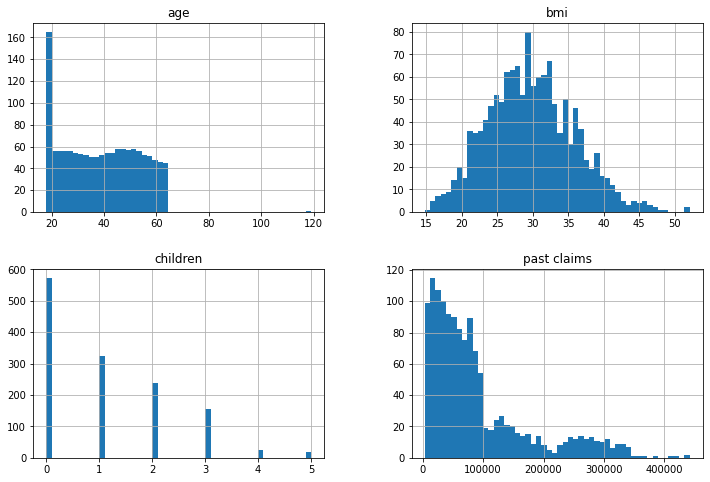

In [6]:
import matplotlib.pyplot as plt
insurance.hist(bins=50, figsize=(12, 8))
plt.show()

**Hist Chart Findings**
  - **Age:** It shows that "around 20" is the biggest part, except that it almost evenly distribution, but it has a **strange value"119"** 
  - **bmi:** It shows that it may look like Gaussian Distribution
  - **children:** most people have 0 child, number decreses with the children numbers increasing
  - **past claims:** it seems that "<=100000" is the biggest part, past claims have **long tail distribution**, min-max and standardization scaling do not work,it may be replaced the feature by its square root or replace it with its log value.

### Use the .value_counts() method to check the categorical data distribution 

In [7]:
for col in insurance.columns:
    if insurance[col].dtype=='object':
        print()
        print(col)
        print(insurance[col].value_counts())


sex
male      676
female    662
Name: sex, dtype: int64

home
South NT            364
North NT            325
Hong Kong Island    325
Kowloon             324
Name: home, dtype: int64

smoker
no     1064
yes     274
Name: smoker, dtype: int64

drinking
occasional    800
frequent      271
no            267
Name: drinking, dtype: int64


**Categorical Data Findings**
  - **sex:** male is a little bit larger than female, but almost evenly distribution
  - **smoker:** non-smoker is larger than smoker
  - **home:** there are four areas, South NT is larger than the other three, but almost evenly distribution
  - **drinking:** most are "occasional drinkers"

#  Visualize and Analyze Data to Gain Insights


## Analyze the Categorical Variables Relations
### Check the Gender with the Past Claims
- Use the boxplot to show the relationship between sex and past claims

[Text(0.5, 1.0, 'Number of Insurance Past Claims by Gender')]

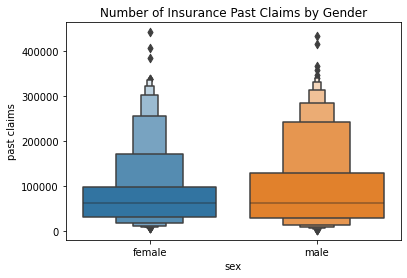

In [8]:
import seaborn as sns
sns.boxenplot(x='sex',y='past claims',data=insurance).set(title='Number of Insurance Past Claims by Gender')

**Findings**
- Men are more widely distributed compared to women, with more men having higher past claims

### Further check the Gender factors
- Why men have larger past claims than women
- Discover the "bmi","age" deeply into the Gender factors
- Discover the "children" factors
- Discover the "smoker" factors
- Disscover the "drinking" factors

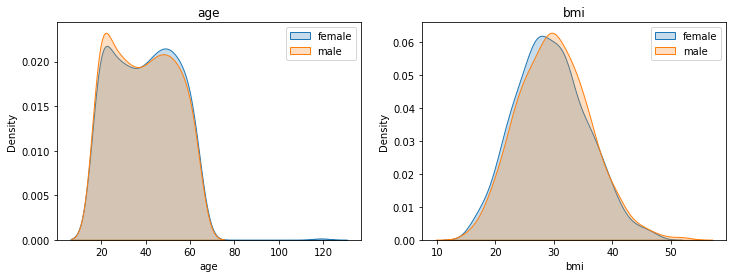

In [9]:
cols = ['age','bmi']
sex = ['female','male']
fig,ax = plt.subplots(1,2,figsize=(12,4))
for col,p in zip(cols,range(2)):
    for s in sex:
        sns.kdeplot(insurance[col][insurance['sex']==s],label=s,ax=ax[p],shade=True)
        ax[p].set_title(col)
        ax[p].legend()
plt.show()

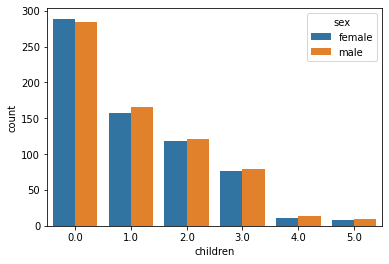

In [10]:
sns.countplot(data=insurance,x='children',hue='sex')
plt.show()

[Text(0.5, 1.0, 'Number of Insurance Past Claims by Gender, Smoker')]

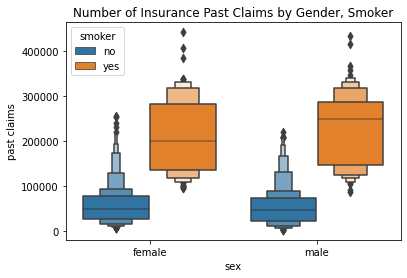

In [11]:
sns.boxenplot(x='sex',y='past claims',hue='smoker',data=insurance).set(title='Number of Insurance Past Claims by Gender, Smoker')

[Text(0.5, 1.0, 'Number of Insurance Past Claims by Gender, Drinking')]

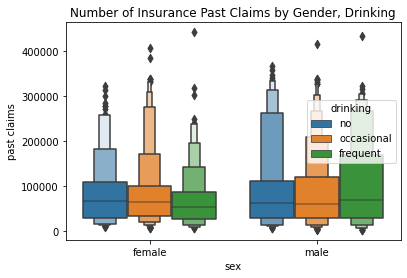

In [12]:
sns.boxenplot(x='sex',y='past claims',hue='drinking',data=insurance).set(title='Number of Insurance Past Claims by Gender, Drinking')

**Findings**
   - The age and bmi of men and women do not differ much
   - The number of men is larger than women in their 20s and slightly smaller than women in their 50s
   - Men have slightly higher bmi than women
   - However, it shows no significant differences, and it was not age and bmi differences that caused the differences
   - There is little difference between men and women in the number of children they raise
   - It seems that **smoker** has the significant influence in the past claims, female and male's smoker claims are both higher than non-smoker

### Discover Smoker, Drinking, Children

[Text(0.5, 1.0, 'Number of Insurance Past Claims by Drinking,Smoker')]

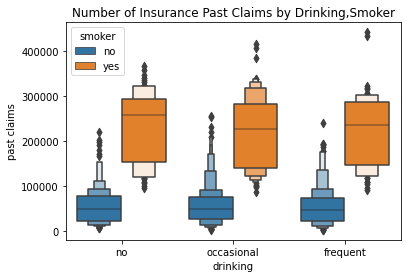

In [13]:
sns.boxenplot(x='drinking',y='past claims',hue='smoker',data=insurance).set(title='Number of Insurance Past Claims by Drinking,Smoker')

[Text(0.5, 1.0, 'Number of Insurance Past Claims by Children,Smoker')]

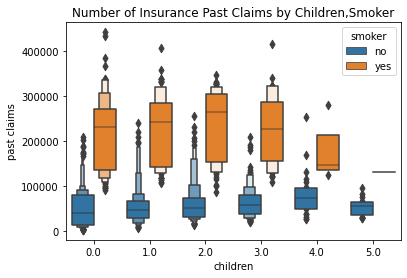

In [14]:
sns.boxenplot(x='children',y='past claims',hue='smoker',data=insurance).set(title='Number of Insurance Past Claims by Children,Smoker')

**Findings**
  - Smoker has higher past claims
  - Different Drinking Degree seems no obvious differences
  - From 0-2 children, with more children more past claims, but over 3 children seems not significant
  - **ALL IN ALL, Smoker has the strong influences on claims**

### Check the Home Areas

[Text(0.5, 1.0, 'Number of Past Claims by Sex, by Home')]

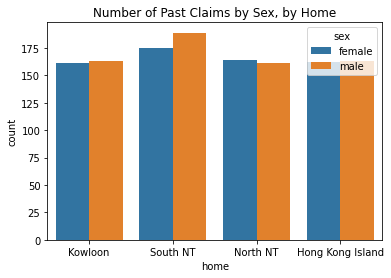

In [15]:
import seaborn as sns
sns.countplot(x='home',hue='sex',data=insurance).set(title='Number of Past Claims by Sex, by Home')


[Text(0.5, 1.0, 'Number of Insurance Past Claims by Drinking,Smoker')]

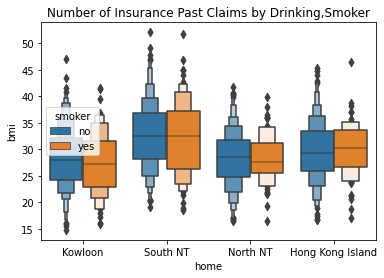

In [16]:
sns.boxenplot(x='home',y='bmi',hue='smoker',data=insurance).set(title='Number of Insurance Past Claims by Drinking,Smoker')

[Text(0.5, 1.0, 'Number of Insurance Past Claims by Drinking,Smoker')]

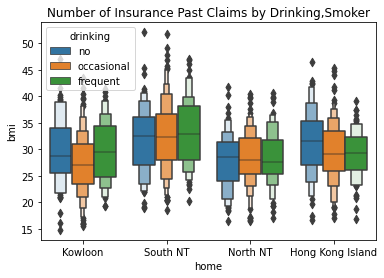

In [17]:
sns.boxenplot(x='home',y='bmi',hue='drinking',data=insurance).set(title='Number of Insurance Past Claims by Drinking,Smoker')

<AxesSubplot:xlabel='home', ylabel='children'>

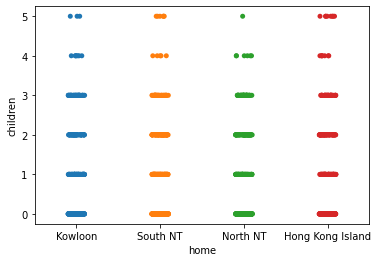

In [18]:
sns.stripplot(data=insurance,x='home',y='children')

**Findings**
  - South NT has the highest Past Claims
    - South NT has higher male claims
    - South NT has largest bmi than the other three regions
    - South NT has larger smokers than the other three regions
    - South NT has larger drinking degree than the other three regions
    - Four regions all have similar children distribution
  - we can coclude that South NT has the highest past claims maily because of the men, bmi,smoke, drinking factors

### Check the Age and BMI

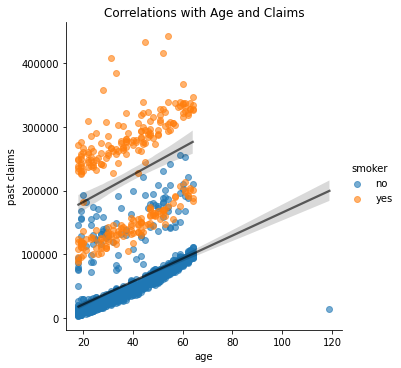

In [19]:
# check the age
sns.lmplot(data=insurance,x='age',y='past claims',hue='smoker',line_kws=dict(color='black',alpha=0.6),scatter_kws=dict(alpha=0.6)).set(title="Correlations with Age and Claims")

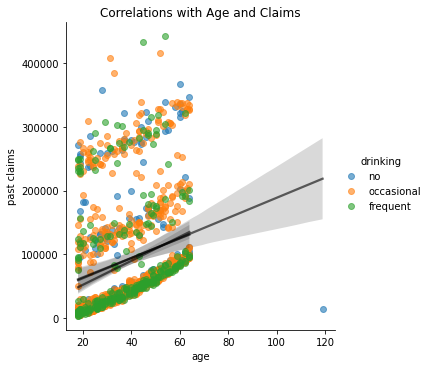

In [20]:
# check the age
sns.lmplot(data=insurance,x='age',y='past claims',hue='drinking',line_kws=dict(color='black',alpha=0.6),scatter_kws=dict(alpha=0.6)).set(title="Correlations with Age and Claims")

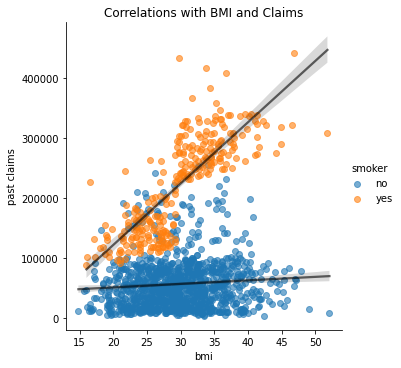

In [21]:
# Check the BMI influences
sns.lmplot(data=insurance,x='bmi',y='past claims',hue='smoker',line_kws=dict(color='black',alpha=0.6),scatter_kws=dict(alpha=0.6)).set(title="Correlations with BMI and Claims")
plt.show()

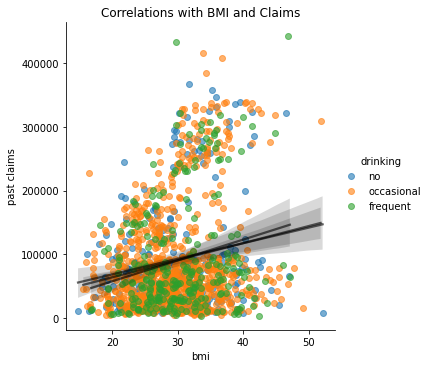

In [22]:
# Check the BMI influences
sns.lmplot(data=insurance,x='bmi',y='past claims',hue='drinking',line_kws=dict(color='black',alpha=0.6),scatter_kws=dict(alpha=0.6)).set(title="Correlations with BMI and Claims")
plt.show()

**Findings**
  - Age has strong positive relationships with claims
  - Non-smoker past claims increase slowly as BMI increases
  - Smokers past claims increase steeply after bmi exceeds 30(fat benchmark)
  - Drinking has no strong siginificance

# Prepare the data for Machine Learning algorithms

## Process the Strange Value of Age

In [23]:
# delete the over 100 ages, it doesn't meet the real case
insurance.drop(insurance[insurance['age'] >= 100].index, inplace = True)

## Process the missing value

In [24]:
# check the missing value 
insurance.isnull()
# finding that data is 1338, but the last 3 rows are all null,so delete the 3 rows
insurance=insurance.dropna(how='all') #delete the last 3 all null rows

In [25]:
insurance.isnull().any()
# the result is that children column has the null value
#next is to cope with the null value in children column

age            False
sex            False
home           False
bmi            False
children        True
smoker         False
drinking       False
past claims    False
dtype: bool

In [26]:
insurance.isnull().sum()
# check how many null values in the column, 3 values in the children are missing

age            0
sex            0
home           0
bmi            0
children       3
smoker         0
drinking       0
past claims    0
dtype: int64

In [27]:
null_row_idx=insurance.isnull().any(axis=1)

In [28]:
insurance.loc[null_row_idx].head()

,age,sex,home,bmi,children,smoker,drinking,past claims
464,61.0,female,Hong Kong Island,38.4,NaN,no,occasional,95669.0
1077,22.0,male,Hong Kong Island,34.1,NaN,no,occasional,20174.0
1317,55.0,male,North NT,31.7,NaN,no,no,73937.0


In [29]:
# choose to fill the median value
median=insurance["children"].median()
insurance["children"].fillna(int(median),inplace=True)
insurance.loc[null_row_idx].head()

,age,sex,home,bmi,children,smoker,drinking,past claims
464,61.0,female,Hong Kong Island,38.4,1.0,no,occasional,95669.0
1077,22.0,male,Hong Kong Island,34.1,1.0,no,occasional,20174.0
1317,55.0,male,North NT,31.7,1.0,no,no,73937.0


## Process the Categorical Data
- sex,home the two definitions have no individual significance, so choose one-hot
- smoker yes,no want to use 0,1 to explain the meaning, so use map method
- drinking has degree, use 0-2 to explain the meaning

In [30]:
i_data=insurance.copy()
i_data['smoker']=i_data['smoker'].map({'yes':1,'no':0})
i_data['drinking']=i_data['drinking'].map({'no':0,'occasional':1,'frequent':2})
i_data=pd.concat([i_data,pd.get_dummies(i_data['sex']),pd.get_dummies(i_data['home'])],axis=1)
del i_data['home']
del i_data['sex']
i_data.head()

,age,bmi,children,smoker,drinking,past claims,female,male,Hong Kong Island,Kowloon,North NT,South NT
0,49.0,32.3,2.0,0,0,72433.0,1,0,0,1,0,0
1,55.0,29.5,2.0,0,1,79358.0,1,0,0,0,0,1
2,53.0,26.0,0.0,0,2,67628.0,1,0,0,0,1,0
3,19.0,33.2,0.0,0,1,7020.0,0,1,1,0,0,0
4,59.0,36.5,1.0,0,2,82368.0,0,1,1,0,0,0


## Check the "past claims" feature
  - Before proceeding with machine learning, check the past claims
  - I see some outliers and long tail distribution on the "past claims", therefore to do some processes
  - but after drop the outliers, it seems not to change significantly, the R square value of the deleted outlier's model even lower
  - Therefore, in the final model, I choose not to delete the outliers of the "past claims"

**The distribution of the "past claims"

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Univariate Analysis : Claim Feature')]

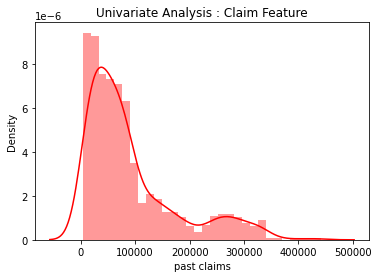

In [31]:
sns.distplot(i_data["past claims"], color="r", kde=True).set(title='Univariate Analysis : Claim Feature')

## Check the Correlations
- use the pearson method and draw the heat map to show the correlations

<AxesSubplot:>

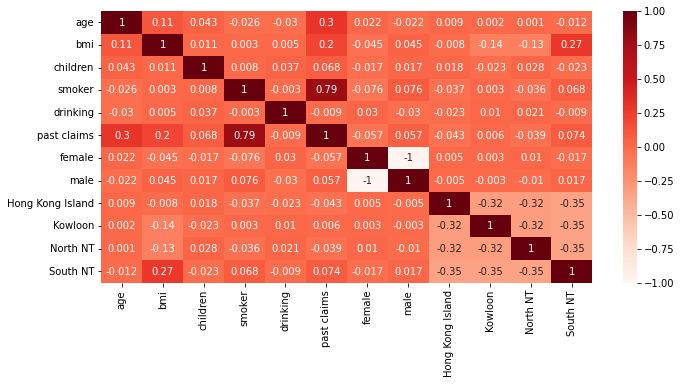

In [32]:
corr=i_data.corr(method='pearson').round(3)
plt.figure(figsize=(11,5))
sns.heatmap(corr,cmap='Reds',annot=True)

**Findings**
  - in the past claims row, we see that age is the largest, next is smoker, bmi
  - the result is same as the before visualization result

# Data Modeling
## Define the Dependent Variables in X and Independent Variable in Y

In [33]:
X=i_data.drop(['past claims'],axis=1)
y=i_data.loc[:,'past claims']

## Standardize the data values to avoid biased outcome

In [34]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
x_scaled=scaler.fit_transform(X)

## Split the data

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_scaled,y, test_size=0.2, random_state=42)
print("Train", X_train.shape, "and test", X_test.shape)

Train (1069, 11) and test (268, 11)


## Training model with training set

In [36]:
from sklearn.linear_model import LinearRegression

lin_reg =LinearRegression()

model=lin_reg.fit(X_train, y_train)

In [37]:
model.score(X_test,y_test)

0.733501173297394

## Use test data to predict and evaluate the model

In [38]:
## create function to fit models
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
model_preds = []
import numpy as np

def fit_model(model, model_name):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = round(r2_score(y_test, y_pred),4)
    adj_r2 = round(1 - (1-r2)*(len(y)-1)/(len(y)-X.shape[1]-1),4)
    mse = round(mean_squared_error(y_test, y_pred),4)
    mae = round(mean_absolute_error(y_test, y_pred),4)
    rmse = round(np.sqrt(mean_squared_error(y_test, y_pred)),4)
    model_preds.append([model_name, r2, adj_r2, mse, mae, rmse])
    print ("The R-Squared Value is: ", r2)
    print ("Adjusted R-Squared Value is: ", adj_r2)
    print("The Mean Squared error (MSE) is: ", mse)
    print("Root Mean Squared Error (RMSE): ", rmse)
    print("Mean Absolute Error (MAE) is: ", mae)

## model evaluation function
def model_eval():
    preds = pd.DataFrame(model_preds)
    preds.columns = ["Mod_Name", "R2 Value", "adj_R2", "MSE", "RMSE", "MAE"]
    return preds.sort_values(by="R2 Value", ascending=False)

In [39]:
fit_model(model, "Linear Regression")

The R-Squared Value is:  0.7335
Adjusted R-Squared Value is:  0.7313
The Mean Squared error (MSE) is:  1798896004.0762
Root Mean Squared Error (RMSE):  42413.3942
Mean Absolute Error (MAE) is:  29576.6895


**Findings of the model
  - it seems the accuary of the Linear Regression is not so high
  - For higher accuracy, it is suggested to train other models, like DecisionTree, RandomForest, K-Neighbors Regression

In [40]:
print(model.intercept_.round(),model.coef_.round())

90451.0 [2.60110000e+04 1.45810000e+04 4.64600000e+03 6.74140000e+04
 2.53000000e+02 5.39996434e+14 5.39996434e+14 4.92181283e+16
 4.91666235e+16 4.91666235e+16 5.10740467e+16]


## Conclusion and Insights

  - As the age of each year increases, assuming that everything is the same (unchanged), we will expect an average of 2.6 medical expenses.
  - For each unit of BMI, the annual medical expenses will increase an average of 1.46.
  - Similarly, each child adds an average of 4.64 additional medical expenses each year;
  - Smoking people spend far more than non -smokers, the higher the degree of Drinking, the higher the cost
  - SOUTH NT tends to have the highest average medical expenses.

  - **The result in the linear regression model is logical**
  - Smoking, smoking and obesity are often linked to other health issues, and additional family members or recipients may lead to increased number of diagnosis and increase in prevention of health care costs, resulting in increased costs

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


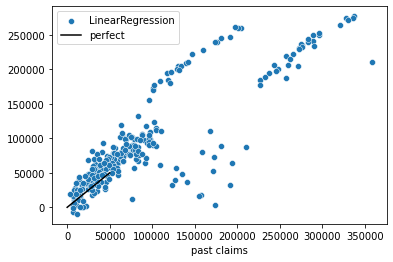

In [41]:
#Draw the Fitted image
y_pre = model.predict(X_test)
sns.scatterplot(y_test,y_pre,label='LinearRegression')
sns.lineplot(x=[0,50000],y=[0,50000],label='perfect',color='black')
plt.legend()
# the result shows that at the first stage that the fitting effect of linear regression is good, but the fitting effect is not good after the past claims become larger